In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np


def linear(x, m, b):
    return m * x + b


# Clean data by removing NaN and Inf values
def clean_data(x, y):
    # Convert to numpy arrays if they're not already
    x_np = np.array(x)
    y_np = np.array(y)
    
    # Create mask for valid values (not NaN or Inf)
    mask = ~np.isnan(x_np) & ~np.isnan(y_np) & ~np.isinf(x_np) & ~np.isinf(y_np)
    
    # Apply mask
    return x_np[mask], y_np[mask]


def load_excel_to_df(data):
    """
    Loads an Excel file named "{data}.xlsx" (without skiprows=1 for non-tracker excels) into a dataframe.
    The dataframe is assigned to a global variable named df_{data}.
    
    Parameters:
        data (str): The base name of the Excel file (without ".xlsx").
    """
    filename = f"{data}.xlsx"
    try:
        df = pd.read_excel(filename)
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        exit()
    globals()[f"df_{data}"] = df
    return df


In [7]:
df = load_excel_to_df("dataTvsI")
# df_maxwell = df_maxwell.dropna(axis=0)  # Drop rows where all elements are NaN
df

,I,T,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.022,1.150,NaN,NaN,NaN,NaN,0.022,1.150,NaN,OLD DATA,NaN
1,0.030,1.693,NaN,NaN,NaN,2.0,0.030,1.693,NaN,0.011,0.6
2,0.046,2.404,NaN,NaN,NaN,3.0,0.046,2.404,NaN,0.022,1.2
3,0.055,2.789,NaN,NaN,NaN,4.0,0.055,2.789,NaN,0.032,1.7
4,0.066,3.236,NaN,NaN,NaN,5.0,0.066,3.236,NaN,0.043,2.3
5,0.071,4.161,NaN,NaN,NaN,6.0,0.071,4.161,NaN,0.054,2.9
6,0.081,4.445,NaN,NaN,NaN,7.0,0.081,4.445,NaN,0.065,3.5
7,0.098,5.303,NaN,NaN,NaN,8.0,0.098,5.303,NaN,0.075,4.1
8,0.104,5.800,NaN,NaN,NaN,9.0,0.104,5.800,NaN,0.086,4.6
9,0.123,6.096,NaN,NaN,NaN,10.0,0.123,6.096,NaN,0.097,5.2


In [8]:
I = df['I'].dropna(axis=0).to_numpy()
T = df['T'].dropna(axis=0).to_numpy()

K_t: [52.10700796  0.1127697 ]


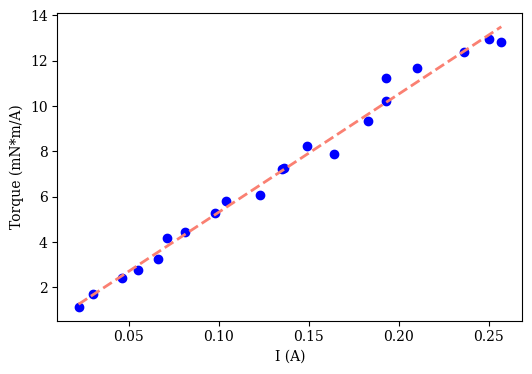

In [9]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["font.size"] = 12
# Add the new set of points to the existing plot
plt.plot(I, T, marker='o', markersize=6 , linestyle='None', color='b')

popt, pcov = opt.curve_fit(linear, I, T)
print("K_t:", popt)

current = np.linspace(min(I), max(I), 100)
y = linear(current, *popt)
plt.plot(current, y, color='salmon', linestyle='dashed', linewidth=2, label='Ajuste lineal')


# Add labels, title, legend (if needed)
plt.xlabel("I (A)")
plt.ylabel("Torque (mN*m/A)")
# plt.legend()  # Show the legend

#plt.ylim(0,5)
# xticks_positions = [0.5, 1.0, 1.5, 2.0]
# xticks_labels = ['0.5', '1.0', '1.5', '2.0']

# yticks_positions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
# yticks_labels = ['0.25', '0.5', '0.75', '1.0', '1.25', '1.5']

# plt.xticks(xticks_positions, xticks_labels)
# plt.yticks(yticks_positions, yticks_labels)

# image size
plt.gcf().set_size_inches(6, 4)
plt.savefig("T-vs-I.png", dpi=300, bbox_inches="tight")
# Display the plot
plt.show()

In [10]:
from graphviz import Digraph

dot = Digraph('viscosimeter_schematic', format='png')
dot.attr(rankdir='LR')

# Power nodes
dot.node('12V', '12 V Supply', shape='ellipse', style='filled', fillcolor='lightgray')
dot.node('5V', '5 V (Arduino)', shape='ellipse', style='filled', fillcolor='lightgray')
dot.node('GND', 'Ground', shape='ellipse', style='filled', fillcolor='lightgray')

# Components
dot.node('VDIV', 'Voltage Divider\nR1 48.7 kΩ\nR2 31.4 kΩ', shape='box')
dot.node('ACS', 'Current Sensor\nACS712‑30A', shape='box')
dot.node('MOTOR', 'DC Motor\nRS‑445PA‑14233R', shape='box')
dot.node('PROX', 'Proximity Sensor\nTCD210245AA', shape='box')
dot.node('SW', 'Switch\n(user input)', shape='box')
dot.node('ARD', 'Arduino Uno', shape='box')

# Connections
dot.edge('12V', 'ACS', label='IP+')
dot.edge('ACS', 'MOTOR', label='IP‑')
dot.edge('MOTOR', 'GND')

dot.edge('12V', 'VDIV', label='R1 top')
dot.edge('VDIV', 'GND', label='R2 bottom')
dot.edge('VDIV', 'ARD', label='A1')

dot.edge('ACS', 'ARD', label='A0 (Vout)')
dot.edge('ACS', '5V', label='Vcc')
dot.edge('ACS', 'GND', label='GND')

dot.edge('PROX', 'ARD', label='D2 (OUT)')
dot.edge('PROX', '5V', label='Vcc')
dot.edge('PROX', 'GND', label='GND')

dot.edge('SW', 'ARD', label='D7')
dot.edge('SW', 'GND')

# Tie 5 V and GND back to Arduino
dot.edge('ARD', '5V', label='5 V out')
dot.edge('ARD', 'GND', label='GND')

# Optional: supply Arduino VIN from 12 V (through onboard regulator)
dot.edge('12V', 'ARD', label='VIN', style='dashed')

file_path = 'viscosimeter_schematic.png'
dot.render(file_path, cleanup=True)
file_path


'viscosimeter_schematic.png'

In [ ]:
"""
Viscosimeter control circuit
---------------------------
This SKiDL script describes the wiring of an Arduino‑based viscosimeter that uses:
  * Arduino Uno (represented as a 2×18 header)
  * ACS712‑30 A Hall‑effect current sensor module
  * RS‑445PA‑14233R DC motor
  * TCD210245AA (TCRT5000‑style) proximity sensor for RPM feedback
  * Resistive divider (48.7 kΩ & 31.4 kΩ) to monitor 12 V rail
  * Debounced push‑button switch

Running the script:
    python viscosimeter_skidl.py
will perform an ERC and output a KiCad‑compatible netlist (viscosimeter.net).

Adjust footprints or part libraries as needed for your CAD setup.
"""

from skidl import *

# Use KiCad symbols/footprints by default.
set_default_tool("kicad")

# -----------------------------------------------------------------------------
# Nets (power rails & signals).
# -----------------------------------------------------------------------------
gnd = Net("GND")
vin12 = Net("+12V")              # Raw motor supply.
vin5 = Net("+5V")                # Regulated 5 V from Arduino.

div_out = Net("V_DIV")          # 12 V monitor node to A1.
i_sense = Net("I_SENSE")        # ACS712 Vout to A0.
prox_out = Net("PROX_OUT")      # Proximity sensor output to D2.
sw_in = Net("SW_IN")            # Push‑button to D7.

# -----------------------------------------------------------------------------
# Discrete components.
# -----------------------------------------------------------------------------
R1 = Part("Device", "R", value="48.7k", footprint="Resistor_SMD:R_0805_2012Metric")
R2 = Part("Device", "R", value="31.4k", footprint="Resistor_SMD:R_0805_2012Metric")

# Voltage divider wiring.
vin12 += R1[1]
R1[2] += R2[1]
R2[2] += gnd
R1[2] += div_out

# -----------------------------------------------------------------------------
# ACS712‑30 A current sensor module.
# Pinout assumed: 1‑Vcc, 2‑GND, 3‑Vout, 4‑IP+, 5‑IP‑
# Substitute your actual library part if pin numbers differ.
# -----------------------------------------------------------------------------
acs = Part("Device", "Module", ref="U?", footprint="Module:ACS712_Module")
acs[1] += vin5          # Vcc (5 V)
acs[2] += gnd           # GND
acs[3] += i_sense       # Vout to Arduino A0
vin12 += acs[4]        # High‑side current input (IP+)
motor_pos = Net("MOTOR_POS")
acs[5] += motor_pos     # IP‑ to motor + terminal

# Motor connector (2‑pin) for RS‑445PA‑14233R.
motor = Part("Device", "Motor_DC", footprint="Connector_Generic:Conn_01x02", ref="M1")
motor[1] += motor_pos   # +
motor[2] += gnd         # –

# -----------------------------------------------------------------------------
# Proximity sensor module (TCRT5000 footprint & pin names).
# Pin mapping: 1‑VCC, 2‑GND, 3‑OUT
# -----------------------------------------------------------------------------
prox = Part("Device", "Module", ref="U?", footprint="Module:TCRT5000_Sensor")
prox[1] += vin5
prox[2] += gnd
prox[3] += prox_out

# Push‑button switch (pull‑up via Arduino internal resistor).
sw = Part("Switch", "SW_Push", footprint="Button_Switch_SMD:SW_SPST_PTS645", ref="SW1")
sw[1] += sw_in
sw[2] += gnd

# -----------------------------------------------------------------------------
# Arduino Uno represented as 2×18 header.
# Map only the pins we use. Update pin numbers if your library differs.
# -----------------------------------------------------------------------------
arduino = Part("Connector", "Conn_02x18_Odd_Even", footprint="Connector_PinHeader_2.54mm:PinHeader_2x18_P2.54mm_Vertical", ref="J1")

# Power pins.
arduino[17] += vin5   # 5 V
arduino[1] += gnd     # GND

# Analog inputs.
arduino[22] += i_sense   # A0 (pin 22 in 2×18 header convention)
arduino[21] += div_out   # A1 (pin 21)

# Digital I/O.
arduino[4] += prox_out   # D2 (pin 4)
arduino[9] += sw_in      # D7 (pin 9)

# (Optional) supply VIN with raw 12 V if desired.
# arduino[3] += vin12    # Uncomment if powering via onboard regulator.

# -----------------------------------------------------------------------------
# Checks & outputs.
# -----------------------------------------------------------------------------
erc()                    # Electrical Rules Check.
generate_netlist(filename="viscosimeter.net")


In [ ]:
# Import the function that creates a VGA display interface.
from circuitsascode.displays.vga import vga

# Create color and sync signals to connect to the VGA interface.
red, grn, blu = Bus(5), Bus(4), Bus(3)
hsync, vsync, gnd = Net(), Net(), Net()

# Create a VGA interface circuit customized for the widths
# of the RGB buses.
vga1 = vga(rgb=(len(red), len(grn), len(blu)))

# Connect the signals to the VGA interface circuit.
vga1.red += red
vga1.grn += grn
vga1.blu += blu
vga1.hsync += hsync
vga1.vsync += vsync
vga1.gnd += gnd

ERROR: Can't open file: Device.
 @ [c:\Users\RenzoStefanoHillmann\Downloads\lab mecanica\others\<frozen importlib._bootstrap>:488=>c:\Users\RenzoStefanoHillmann\anaconda3\Lib\site-packages\circuitsascode\displays\vga.py:15]


Set KICAD_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KICAD9_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KIPRJMOD to: C:\Users\RenzoStefanoHillmann\OneDrive - DATAKNOW S.A.S\Documentos\esquema_elect
KICAD_SYMBOL_DIR: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
KICAD9_SYMBOL_DIR: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols


FileNotFoundError: Can't open file: Device.


In [ ]:
import os
print(os.environ.get("KICAD_SYMBOL_DIR"))

None


In [8]:
import os

# Set KiCad environment variables
kicad_paths = {
    "KICAD_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD9_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD6_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD7_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols", 
    "KICAD8_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KIPRJMOD": r"C:\Users\RenzoStefanoHillmann\OneDrive - DATAKNOW S.A.S\Documentos\esquema_elect"
}

# Set the environment variables
for key, path in kicad_paths.items():
    os.environ[key] = path
    print(f"Set {key} to: {path}")

Set KICAD_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KICAD9_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KICAD6_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KICAD7_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KICAD8_SYMBOL_DIR to: C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols
Set KIPRJMOD to: C:\Users\RenzoStefanoHillmann\OneDrive - DATAKNOW S.A.S\Documentos\esquema_elect


In [9]:
import os
symbol_path = os.path.join(os.environ["KICAD_SYMBOL_DIR"], "Device.kicad_sym")
print(f"Device.kicad_sym exists: {os.path.exists(symbol_path)}")

Device.kicad_sym exists: True


In [10]:
# Import the function that creates a VGA display interface.
from circuitsascode.displays.vga import vga

# Create color and sync signals to connect to the VGA interface.
red, grn, blu = Bus(5), Bus(4), Bus(3)
hsync, vsync, gnd = Net(), Net(), Net()

# Create a VGA interface circuit customized for the widths
# of the RGB buses.
vga1 = vga(rgb=(len(red), len(grn), len(blu)))

# Connect the signals to the VGA interface circuit.
vga1.red += red
vga1.grn += grn
vga1.blu += blu
vga1.hsync += hsync
vga1.vsync += vsync
vga1.gnd += gnd

ERROR: Can't open file: Device.
 @ [c:\Users\RenzoStefanoHillmann\Downloads\lab mecanica\others\<frozen importlib._bootstrap>:488=>c:\Users\RenzoStefanoHillmann\anaconda3\Lib\site-packages\circuitsascode\displays\vga.py:15]


FileNotFoundError: Can't open file: Device.


In [7]:
import os
symbol_path = os.path.join(os.environ["KICAD_SYMBOL_DIR"], "Device.kicad_sym")
print(f"Device.kicad_sym exists: {os.path.exists(symbol_path)}")

Device.kicad_sym exists: True


In [11]:
import os
from skidl import lib_search_paths, KICAD

# Set environment variables first
kicad_paths = {
    "KICAD_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD9_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD6_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KICAD7_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols", 
    "KICAD8_SYMBOL_DIR": r"C:\Users\RenzoStefanoHillmann\AppData\Local\Programs\KiCad\9.0\share\kicad\symbols",
    "KIPRJMOD": r"C:\Users\RenzoStefanoHillmann\OneDrive - DATAKNOW S.A.S\Documentos\esquema_elect"
}

for key, path in kicad_paths.items():
    os.environ[key] = path

# Explicitly add symbol directory to SKiDL's search paths
symbol_dir = os.environ["KICAD_SYMBOL_DIR"]
if symbol_dir not in lib_search_paths[KICAD]:
    lib_search_paths[KICAD].append(symbol_dir)
    
# Print search paths for debugging
print(f"SKiDL search paths: {lib_search_paths[KICAD]}")

# Now try to import and use the VGA module
from circuitsascode.displays.vga import vga

# Create color and sync signals to connect to the VGA interface
red, grn, blu = Bus(5), Bus(4), Bus(3)
hsync, vsync, gnd = Net(), Net(), Net()

# Create a VGA interface circuit
vga1 = vga(rgb=(len(red), len(grn), len(blu)))

# Connect signals
vga1.red += red
vga1.grn += grn
vga1.blu += blu
vga1.hsync += hsync
vga1.vsync += vsync
vga1.gnd += gnd

SKiDL search paths: ['.', 'C:\\Users\\RenzoStefanoHillmann\\AppData\\Local\\Programs\\KiCad\\9.0\\share\\kicad\\symbols']


ERROR: Unable to find part DB15_Female_HighDensity_MountingHoles in library Connector. @ [c:\Users\RenzoStefanoHillmann\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3577=>C:\Users\RenzoStefanoHillmann\AppData\Local\Temp\ipykernel_7260\2048712820.py:33]


ValueError: Unable to find part DB15_Female_HighDensity_MountingHoles in library Connector.

In [12]:
from skidl import *

# Create a minimal implementation for testing
@SubCircuit
def simple_vga(rgb=(5, 4, 3)):
    # Create the interface
    interface = Interface(
        red=Bus(rgb[0], 'red'),
        grn=Bus(rgb[1], 'grn'),
        blu=Bus(rgb[2], 'blu'),
        hsync=Net('hsync'),
        vsync=Net('vsync'),
        gnd=Net('gnd')
    )
    
    print("Created simple VGA interface")
    return interface

# Use the simple implementation
red, grn, blu = Bus(5), Bus(4), Bus(3)
hsync, vsync, gnd = Net(), Net(), Net()

vga1 = simple_vga(rgb=(len(red), len(grn), len(blu)))

vga1.red += red
vga1.grn += grn
vga1.blu += blu
vga1.hsync += hsync
vga1.vsync += vsync
vga1.gnd += gnd

print("VGA interface connected successfully")

Created simple VGA interface
VGA interface connected successfully


In [13]:
# Import the function that creates a VGA display interface.
from circuitsascode.displays.vga import vga

# Create color and sync signals to connect to the VGA interface.
red, grn, blu = Bus(5), Bus(4), Bus(3)
hsync, vsync, gnd = Net(), Net(), Net()

# Create a VGA interface circuit customized for the widths
# of the RGB buses.
vga1 = vga(rgb=(len(red), len(grn), len(blu)))

# Connect the signals to the VGA interface circuit.
vga1.red += red
vga1.grn += grn
vga1.blu += blu
vga1.hsync += hsync
vga1.vsync += vsync
vga1.gnd += gnd

ERROR: Unable to find part DB15_Female_HighDensity_MountingHoles in library Connector. @ [c:\Users\RenzoStefanoHillmann\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3577=>C:\Users\RenzoStefanoHillmann\AppData\Local\Temp\ipykernel_7260\2409112766.py:10]


ValueError: Unable to find part DB15_Female_HighDensity_MountingHoles in library Connector.